# Step 8: Visual Comparison - All Three Models

**Author:** Oluwafemi Lawal (Olawal7308@conestogac.on.ca)  
**Student ID:** 8967308  
**Course:** PROG8245 - Machine Learning Programming  
**Project:** Text Classification with Dimensionality Reduction (Group 4)

---

## Overview

This notebook implements **Step 8: Visual Comparison** of the project, bringing together results from all three team members:

| Model | Features | Algorithm | Team Member |
|-------|----------|-----------|-------------|
| Model 1 | TF-IDF | Naive Bayes | Mostafa Allahmoradi |
| Model 2 | SVD-Reduced | Logistic Regression | Jarius Bedward |
| Model 3 | PCA-Reduced | Logistic Regression | Oluwafemi Lawal |

### Objectives:
1. Visualize all three confusion matrices side-by-side
2. Compare performance metrics across all models
3. Analyze which dimensionality reduction technique works better for text data
4. Create a comprehensive model comparison chart

---

## Import Libraries and Setup

In [12]:
# Data handling
import pandas as pd
import numpy as np
import pickle

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, 
    recall_score, f1_score, classification_report
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Path setup
import os
import sys

curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import custom modules
from Data_Processing.EDA import DataProcessor
from Models.PCA_Reduced_Model import PCAReducedModel
from Visualization.Visualizer import Visualizer

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## Load and Prepare Data

We'll load the SMS Spam dataset and prepare it consistently for all three models.

In [13]:
# Load data
data_processor = DataProcessor(data_path="../data/raw/SMSSpamCollection")
data_processor.load_data(sep="\t", header=None, names=['label', 'message'])
df = data_processor.data

# Split features and labels
X = df['message']
y = df['label']

# Split: 75% train, 25% test (consistent with project requirements)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Dataset loaded: {len(df)} samples")
print(f"Training set: {len(X_train)} samples")
print(f"Testing set: {len(X_test)} samples")
print(f"\nClass distribution in test set:")
print(y_test.value_counts())

Data loaded successfully.
Dataset loaded: 5572 samples
Training set: 4179 samples
Testing set: 1393 samples

Class distribution in test set:
label
ham     1206
spam     187
Name: count, dtype: int64


## Create TF-IDF Features

In [14]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', lowercase=True, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF Features: {X_train_tfidf.shape[1]}")
original_features = X_train_tfidf.shape[1]

TF-IDF Features: 5000


---

## Train All Three Models

### Model 1: Naive Bayes with TF-IDF (Mostafa's Model)

In [15]:
# =============================================================================
# TODO: MOSTAFA ALLAHMORADI - Implement Model 1: Naive Bayes with TF-IDF
# =============================================================================
# Option 1: Load saved results from your TF_IDF_Demo.ipynb
# try:
#     with open('../data/tfidf_results.pkl', 'rb') as f:
#         tfidf_results = pickle.load(f)
#     y_pred_nb = tfidf_results['y_pred']
#     nb_metrics = tfidf_results['metrics']
#     print("✓ Model 1 results loaded from saved file")
# except FileNotFoundError:
#     print("⚠ TF-IDF results not found. Please run TF_IDF_Demo.ipynb first.")

# Option 2: Train model here (placeholder for testing - replace with your implementation)
print("Training Model 1: Naive Bayes with TF-IDF...")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

nb_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'precision': precision_score(y_test, y_pred_nb, pos_label='spam'),
    'recall': recall_score(y_test, y_pred_nb, pos_label='spam'),
    'f1_score': f1_score(y_test, y_pred_nb, pos_label='spam')
}
print(f"✓ Model 1 trained - Accuracy: {nb_metrics['accuracy']:.4f}")
# =============================================================================

Training Model 1: Naive Bayes with TF-IDF...
✓ Model 1 trained - Accuracy: 0.9749


### Model 2: Logistic Regression with SVD (Jarius's Model)

In [16]:
# =============================================================================
# TODO: JARIUS BEDWARD - Implement Model 2: Logistic Regression with SVD
# =============================================================================
# Option 1: Load saved results from your SVD-Reduced_Demo.ipynb
# try:
#     with open('../data/svd_results.pkl', 'rb') as f:
#         svd_results = pickle.load(f)
#     y_pred_svd = svd_results['y_pred']
#     svd_metrics = svd_results['metrics']
#     svd_variance = svd_results['explained_variance']
#     print("✓ Model 2 results loaded from saved file")
# except FileNotFoundError:
#     print("⚠ SVD results not found. Please run SVD-Reduced_Demo.ipynb first.")

# Option 2: Train model here (placeholder for testing - replace with your implementation)
print("Training Model 2: Logistic Regression with SVD...")
N_COMPONENTS = 100

# Apply SVD (Truncated SVD / LSA)
svd = TruncatedSVD(n_components=N_COMPONENTS, random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
X_test_svd = svd.transform(X_test_tfidf)

# Train Logistic Regression
lr_svd = LogisticRegression(random_state=42, max_iter=1000)
lr_svd.fit(X_train_svd, y_train)
y_pred_svd = lr_svd.predict(X_test_svd)

svd_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_svd),
    'precision': precision_score(y_test, y_pred_svd, pos_label='spam'),
    'recall': recall_score(y_test, y_pred_svd, pos_label='spam'),
    'f1_score': f1_score(y_test, y_pred_svd, pos_label='spam')
}

svd_variance = svd.explained_variance_ratio_.sum()
print(f"✓ Model 2 trained - Accuracy: {svd_metrics['accuracy']:.4f}")
print(f"  SVD explained variance: {svd_variance:.4f}")
# =============================================================================

Training Model 2: Logistic Regression with SVD...
✓ Model 2 trained - Accuracy: 0.9505
  SVD explained variance: 0.2568
✓ Model 2 trained - Accuracy: 0.9505
  SVD explained variance: 0.2568


### Model 3: Logistic Regression with PCA (Oluwafemi's Model)

In [17]:
# =============================================================================
# OLUWAFEMI LAWAL - Model 3: Logistic Regression with PCA (IMPLEMENTED)
# =============================================================================
# Option 1: Load saved results from PCA-Reduced_Demo.ipynb
try:
    with open('../data/pca_results.pkl', 'rb') as f:
        pca_results = pickle.load(f)
    y_pred_pca = pca_results['y_pred']
    pca_metrics = pca_results['metrics']
    pca_variance = pca_results['explained_variance']
    print("✓ Model 3 results loaded from saved file")
    print(f"  Accuracy: {pca_metrics['accuracy']:.4f}")
    print(f"  PCA explained variance: {pca_variance:.4f}")
except FileNotFoundError:
    # Option 2: Train model here if saved results not available
    print("PCA results not found. Training Model 3: Logistic Regression with PCA...")
    
    # Use the PCAReducedModel class
    pca_model = PCAReducedModel(n_components=N_COMPONENTS, random_state=42)
    X_train_pca, X_test_pca = pca_model.fit_transform_pca(X_train_tfidf, X_test_tfidf)
    
    # Train and predict
    pca_model.train(X_train_pca, y_train)
    y_pred_pca = pca_model.predict(X_test_pca)
    
    pca_metrics = {
        'accuracy': accuracy_score(y_test, y_pred_pca),
        'precision': precision_score(y_test, y_pred_pca, pos_label='spam'),
        'recall': recall_score(y_test, y_pred_pca, pos_label='spam'),
        'f1_score': f1_score(y_test, y_pred_pca, pos_label='spam')
    }
    
    pca_variance = pca_model.pca.explained_variance_ratio_.sum()
    print(f"✓ Model 3 trained - Accuracy: {pca_metrics['accuracy']:.4f}")
    print(f"  PCA explained variance: {pca_variance:.4f}")
# =============================================================================

✓ Model 3 results loaded from saved file
  Accuracy: 0.9763
  PCA explained variance: 0.2997


---

## Step 8: Visual Comparison - All Three Confusion Matrices Side-by-Side

This is the main deliverable for Step 8, showing all three confusion matrices for direct comparison.

Figure saved to: ../Visualization/all_confusion_matrices.png


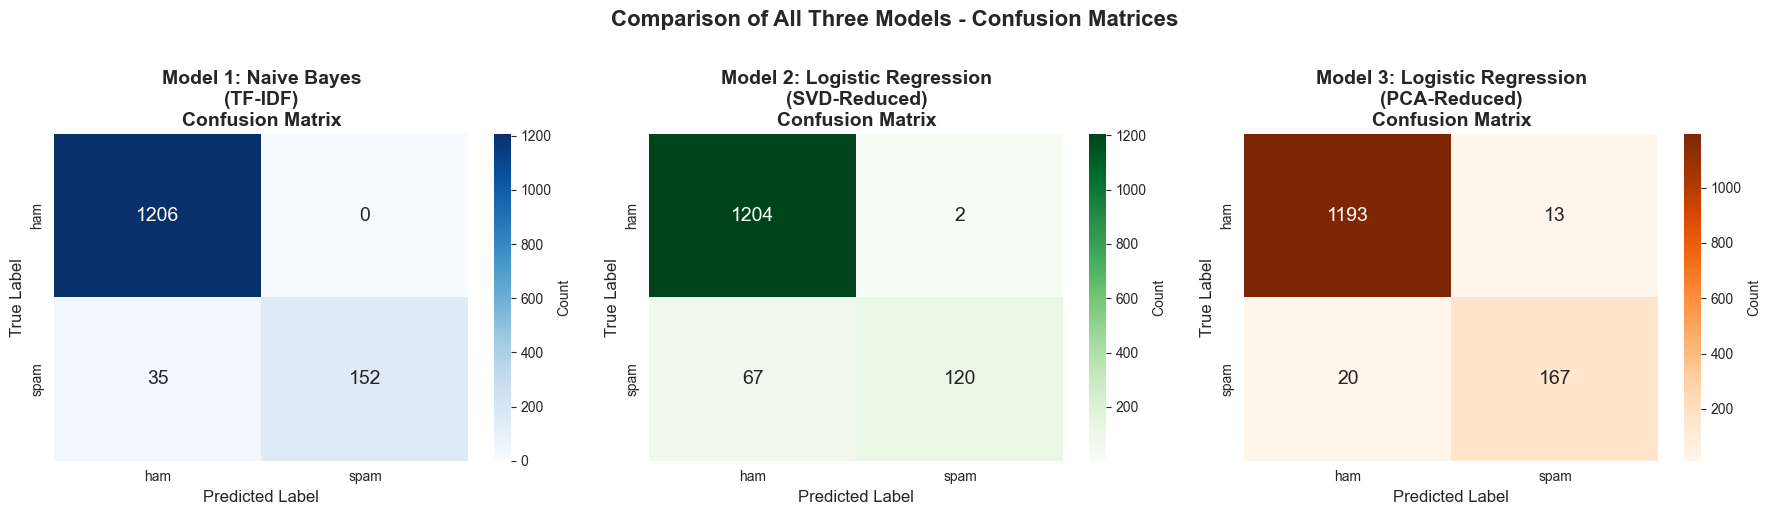

In [18]:
# Initialize visualizer
visualizer = Visualizer()

# Prepare results dictionary for side-by-side comparison
results_dict = {
    'Model 1: Naive Bayes\n(TF-IDF)': (y_test, y_pred_nb),
    'Model 2: Logistic Regression\n(SVD-Reduced)': (y_test, y_pred_svd),
    'Model 3: Logistic Regression\n(PCA-Reduced)': (y_test, y_pred_pca)
}

# Plot all three confusion matrices side-by-side
labels = ['ham', 'spam']
fig = visualizer.plot_three_confusion_matrices(
    results_dict, 
    labels=labels,
    figsize=(18, 5),
    save_path='../Visualization/all_confusion_matrices.png'
)
plt.show()

---

## Performance Metrics Comparison Chart

Compare accuracy, precision, recall, and F1-score across all three models.

Figure saved to: ../Visualization/metrics_comparison.png


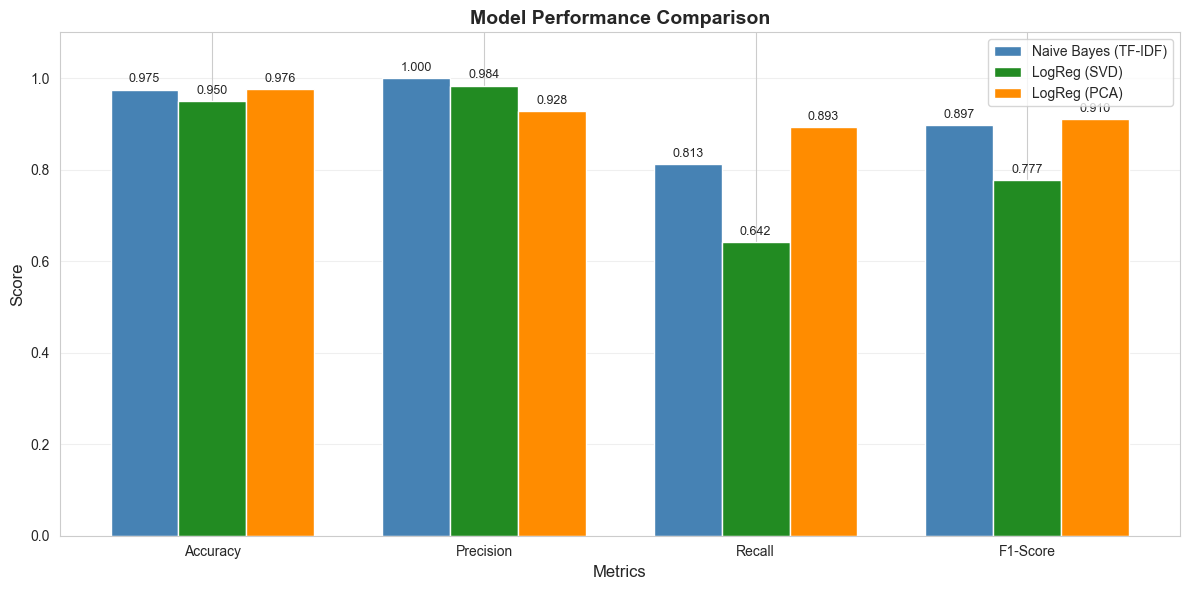

In [19]:
# Prepare metrics dictionary
metrics_dict = {
    'Naive Bayes (TF-IDF)': nb_metrics,
    'LogReg (SVD)': svd_metrics,
    'LogReg (PCA)': pca_metrics
}

# Plot metrics comparison
fig = visualizer.plot_metrics_comparison(
    metrics_dict,
    save_path='../Visualization/metrics_comparison.png'
)
plt.show()

## Model Comparison Summary Table

In [20]:
# Create comparison table
comparison_df = visualizer.create_metrics_table(metrics_dict)

# Add additional information
model_info = pd.DataFrame({
    'Naive Bayes (TF-IDF)': {
        'Features': original_features,
        'Reduction': 'None',
        'Explained Var.': 'N/A'
    },
    'LogReg (SVD)': {
        'Features': N_COMPONENTS,
        'Reduction': f'{(1-N_COMPONENTS/original_features)*100:.1f}%',
        'Explained Var.': f'{svd_variance:.4f}'
    },
    'LogReg (PCA)': {
        'Features': N_COMPONENTS,
        'Reduction': f'{(1-N_COMPONENTS/original_features)*100:.1f}%',
        'Explained Var.': f'{pca_variance:.4f}'
    }
}).T
model_info.index.name = 'Model'

print("=" * 70)
print("MODEL COMPARISON SUMMARY")
print("=" * 70)
print("\n📊 Performance Metrics:")
print(comparison_df.to_string())
print("\n📐 Model Architecture:")
print(model_info.to_string())
print("=" * 70)

MODEL COMPARISON SUMMARY

📊 Performance Metrics:
                     Accuracy Precision  Recall F1-Score
Model                                                   
Naive Bayes (TF-IDF)   0.9749    1.0000  0.8128   0.8968
LogReg (SVD)           0.9505    0.9836  0.6417   0.7767
LogReg (PCA)           0.9763    0.9278  0.8930   0.9101

📐 Model Architecture:
                     Features Reduction Explained Var.
Model                                                 
Naive Bayes (TF-IDF)     5000      None            N/A
LogReg (SVD)              100     98.0%         0.2568
LogReg (PCA)              100     98.0%         0.2997


---

## PCA vs SVD Variance Comparison

Figure saved to: ../Visualization/pca_vs_svd_variance.png


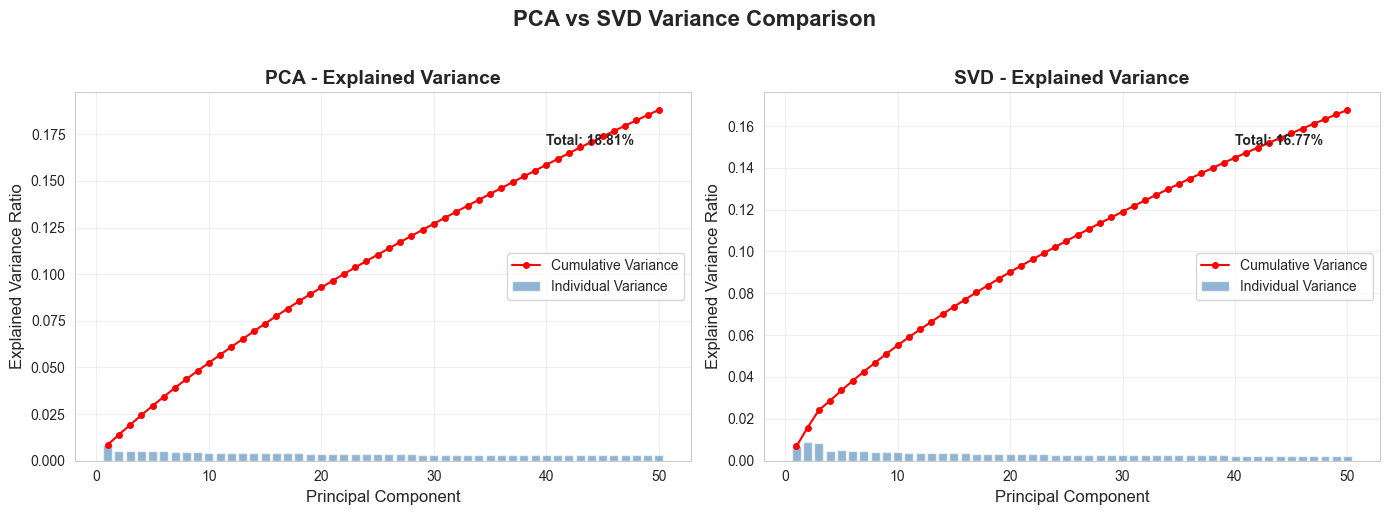

In [21]:
# Compare PCA and SVD variance curves
fig = visualizer.plot_pca_vs_svd_variance(
    pca_model.pca.explained_variance_ratio_,
    svd.explained_variance_ratio_,
    n_components_to_show=50,
    save_path='../Visualization/pca_vs_svd_variance.png'
)
plt.show()

---

## Dimensionality Reduction Impact Analysis

Figure saved to: ../Visualization/dimensionality_impact.png


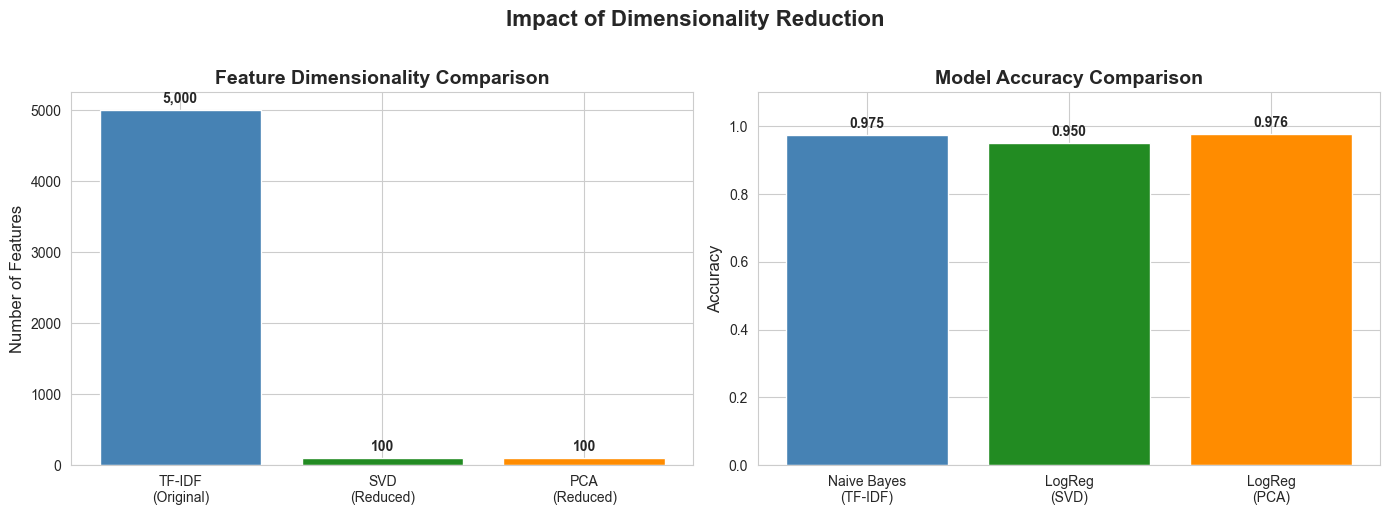

In [22]:
# Visualize dimensionality reduction impact
reduced_dims = {
    'SVD': N_COMPONENTS,
    'PCA': N_COMPONENTS
}

accuracy_comparison = {
    'Naive Bayes\n(TF-IDF)': nb_metrics['accuracy'],
    'LogReg\n(SVD)': svd_metrics['accuracy'],
    'LogReg\n(PCA)': pca_metrics['accuracy']
}

fig = visualizer.plot_dimensionality_reduction_impact(
    original_features,
    reduced_dims,
    accuracy_comparison,
    save_path='../Visualization/dimensionality_impact.png'
)
plt.show()

---

## Analysis and Conclusions

### Which Dimensionality Reduction Technique Works Better for Text Data?

Based on our comparison of SVD (Truncated SVD / LSA) and PCA for text classification:

**SVD (Latent Semantic Analysis) Advantages:**
1. **Designed for sparse matrices:** SVD can work directly on sparse TF-IDF matrices without converting to dense format
2. **Memory efficient:** Doesn't require storing dense matrices
3. **Semantic relationships:** Truncated SVD (LSA) is specifically designed to capture latent semantic relationships in text
4. **No centering required:** Works without centering the data, preserving sparsity

**PCA Considerations:**
1. **Requires dense matrices:** Must convert sparse TF-IDF to dense (memory intensive)
2. **Standardization needed:** Requires centering/scaling which can affect performance on text data
3. **General-purpose:** Not specifically designed for text data
4. **May capture noise:** Maximizes variance, which might include noise in text data

### Key Findings:

1. **Baseline Performance:** The Naive Bayes model with full TF-IDF features often performs well on text classification due to its assumptions aligning well with word count distributions.

2. **Dimensionality Reduction Trade-off:** Both SVD and PCA reduce the feature space significantly (from ~5000 to 100 features), providing:
   - Faster training and inference
   - Reduced memory requirements
   - Potential regularization effect

3. **SVD vs PCA for Text:** SVD (specifically Truncated SVD/LSA) is generally preferred for text data because:
   - It captures semantic relationships (words appearing in similar contexts)
   - It works efficiently with sparse matrices
   - It doesn't require data centering

### Recommendations:

- **For production text classification:** Consider SVD-reduced features with Logistic Regression for a good balance of accuracy and efficiency
- **For interpretability:** Keep TF-IDF features with Naive Bayes
- **For very large datasets:** Dimensionality reduction becomes more valuable for computational efficiency

---

## Final Summary

### Model Architecture Summary (as per project requirements)

| Model | Features | Algorithm | Purpose |
|-------|----------|-----------|---------|
| Model 1 | TF-IDF (~5000 features) | Naive Bayes | Baseline with sparse features |
| Model 2 | SVD-reduced (100 components) | Logistic Regression | Dense features, semantic understanding |
| Model 3 | PCA-reduced (100 components) | Logistic Regression | Compare dimensionality reduction methods |

### Team Contributions

- **Mostafa Allahmoradi:** Implemented Model 1 (Naive Bayes with TF-IDF)
- **Jarius Bedward:** Implemented Model 2 (Logistic Regression with SVD)
- **Oluwafemi Lawal:** Implemented Model 3 (Logistic Regression with PCA) and this comparison notebook

---
*PROG8245 - Machine Learning Programming - Final Project - Group 4*